In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Reading data

In [37]:
student_data = pd.read_csv("../datasets/student-alcohol-consumption.csv")
mpg = pd.read_csv("../datasets/mpg.csv")
survey_data = pd.read_csv("../datasets/young-people-survey-responses.csv")
insurance = pd.read_csv("../datasets/insurance_premiums.csv")
bikes = pd.read_csv("../datasets/bike_share.csv")
daily_show = pd.read_csv("../datasets/daily_show_guests_cleaned.csv")
college = pd.read_csv("../datasets/college_datav3.csv")

# Example 1 - scatterplot

<Axes: xlabel='absences', ylabel='G3'>

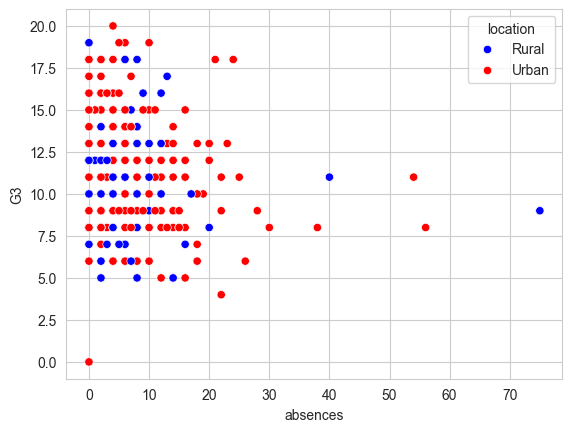

In [4]:
fig, ax = plt.subplots()
sns.scatterplot(data=student_data, 
                x="absences",
                y="G3",
                hue="location",
                hue_order=["Rural", "Urban"],
                palette={
                    "Rural": "Blue",
                    "Urban": "Red"
                },
                ax=ax)

# Example 2 - relplot

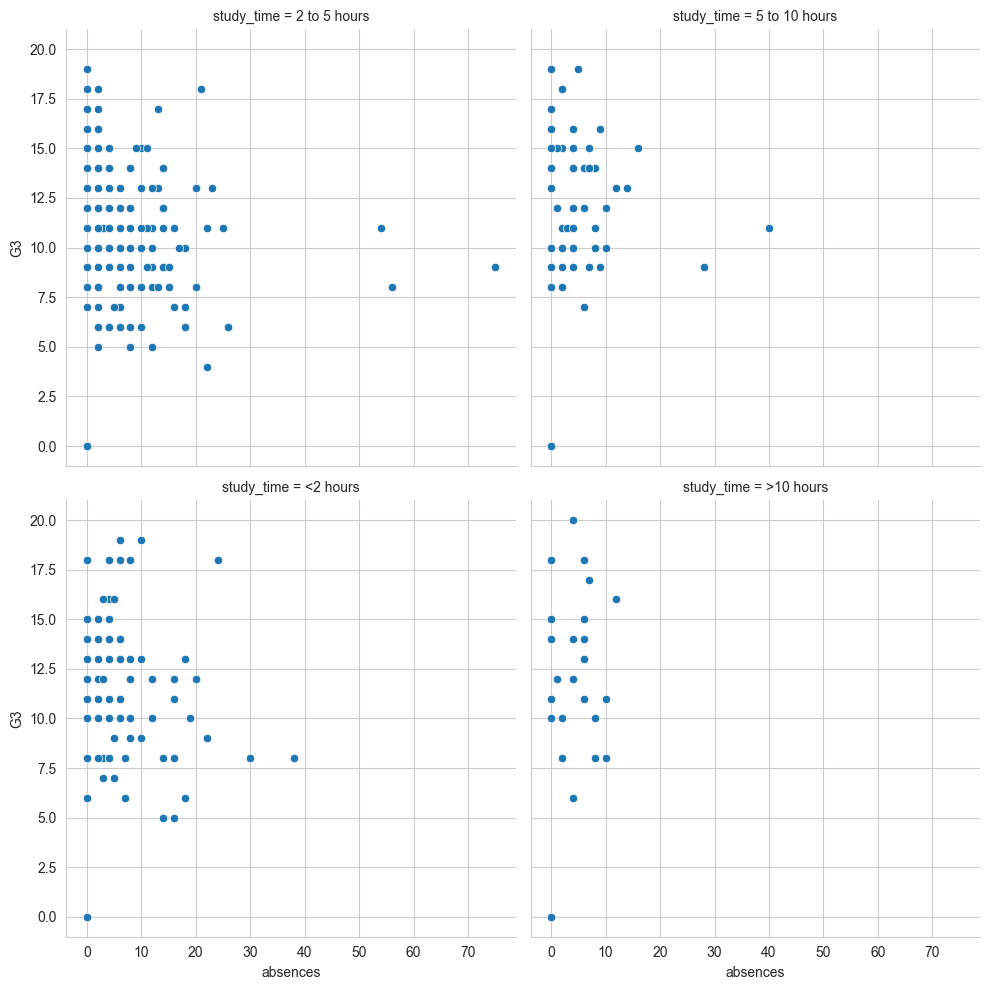

In [5]:
sns.relplot(x="absences",
            y="G3",
            data=student_data,
            kind="scatter",
            col="study_time",
            col_wrap=2
            )
plt.show()

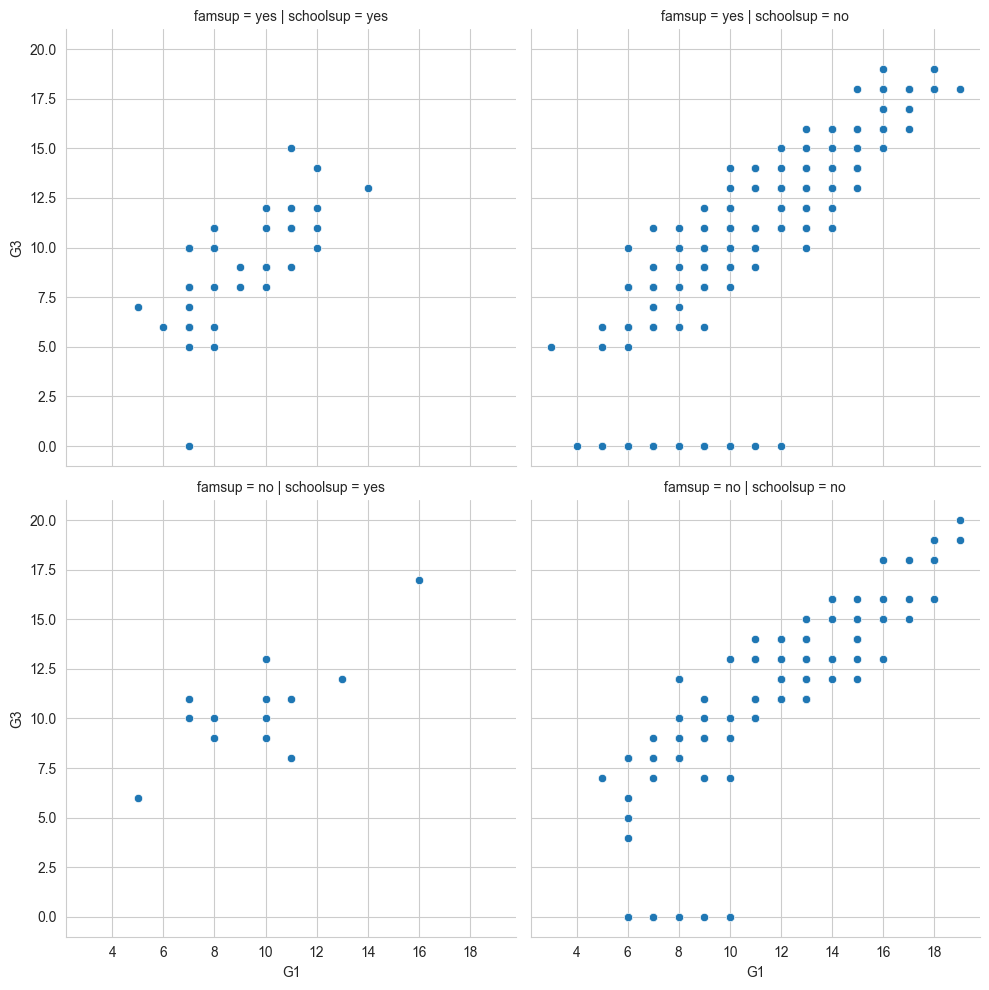

In [6]:
sns.relplot(x="G1", y="G3", 
            data=student_data,
            kind="scatter", 
            col="schoolsup",
            row="famsup",
            col_order=["yes", "no"],
            row_order=["yes","no"])
plt.show()

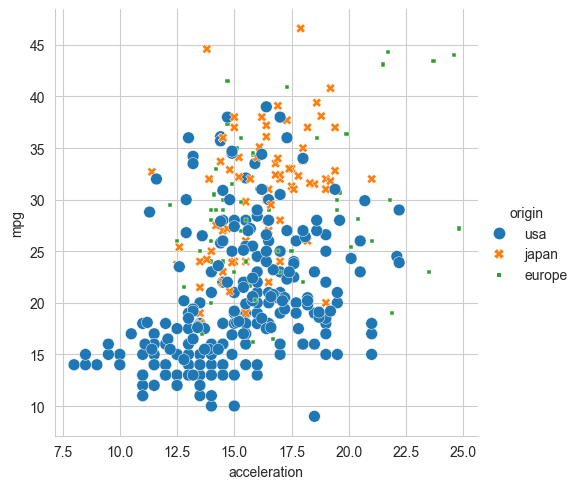

In [7]:
# Create a scatter plot of acceleration vs. mpg

sns.relplot(x='acceleration', y="mpg", style='origin', data=mpg, kind='scatter', hue='origin', size='origin')


# Show plot
plt.show()

# Example 3 - relplot (lineplot)

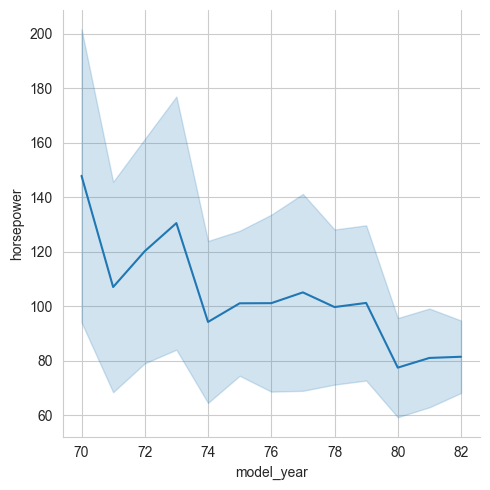

In [8]:
sns.relplot(x='model_year', 
            y="horsepower", 
            data=mpg,
            kind='line',
            errorbar='sd' # The default is the confidence interval, None for nothing
            )
plt.show()

# Example 4 - catplot

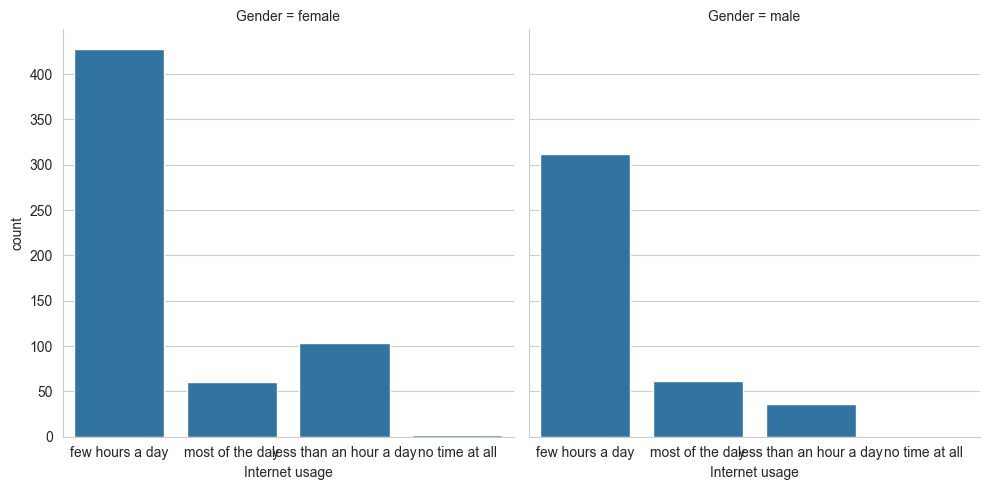

In [9]:
sns.catplot(data=survey_data,
            x="Internet usage",
            kind="count",
            col="Gender")
plt.show()

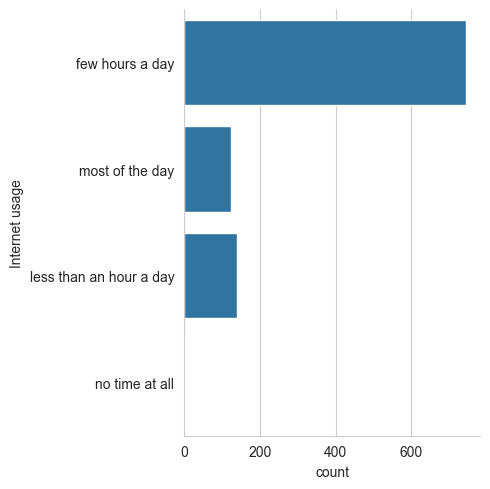

In [10]:
sns.catplot(data=survey_data,
            y="Internet usage",
            kind="count")
plt.show()

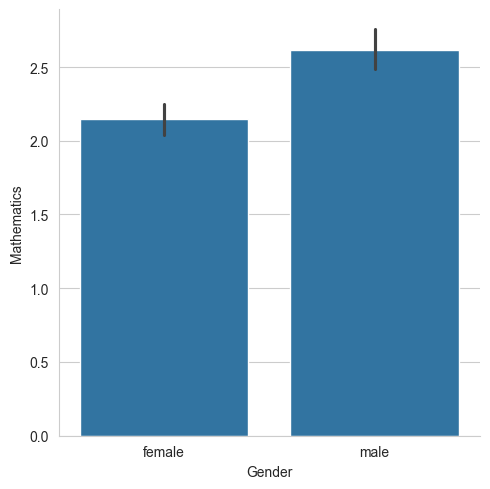

In [11]:
sns.catplot(data=survey_data, x="Gender", y="Mathematics", kind="bar")

# Show plot
plt.show()

# Example 5 - catplot (boxplopt)

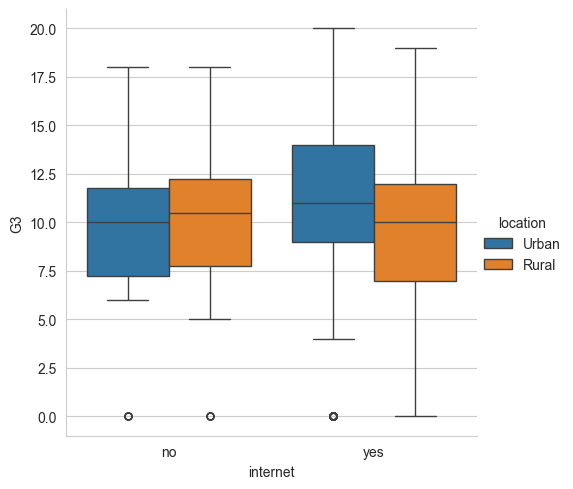

In [12]:
# Create a box plot with subgroups and omit the outliers
sns.catplot(data=student_data, 
x="internet",
y="G3",
hue="location",
kind="box")


# Show plot
plt.show()

# Example 6 - catplot (pointplot)

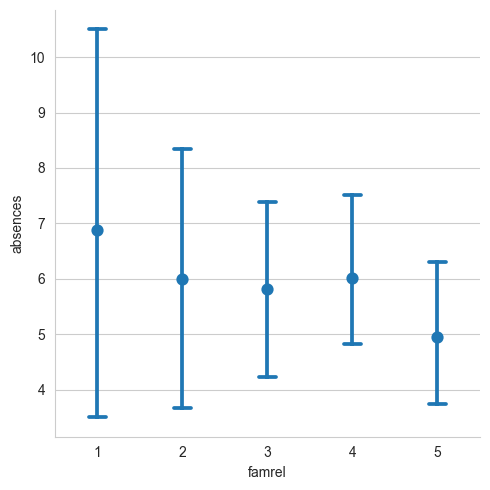

In [13]:
# Remove the lines joining the points
sns.catplot(x="famrel", y="absences",
			data=student_data,
            kind="point",
            capsize=0.2,
            linestyle='none')
            
# Show plot
plt.show()

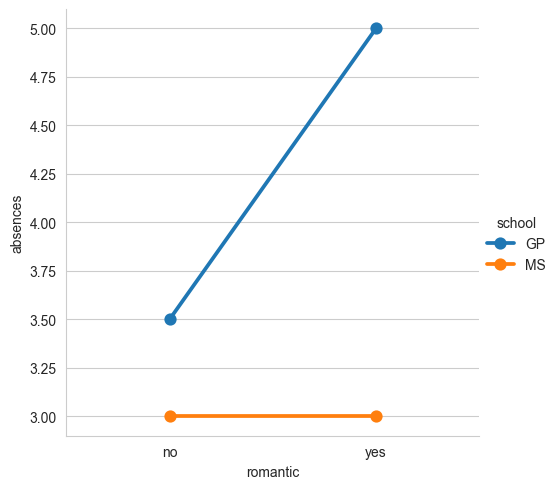

In [14]:
# Import median function from numpy
from numpy import median

# Plot the median number of absences instead of the mean
sns.catplot(x="romantic", y="absences",
			data=student_data,
            kind="point",
            hue="school",
            errorbar=None,
            estimator=median)

# Show plot
plt.show()

# Contexts

<class 'matplotlib.axes._axes.Axes'>
<class 'seaborn.axisgrid.FacetGrid'>


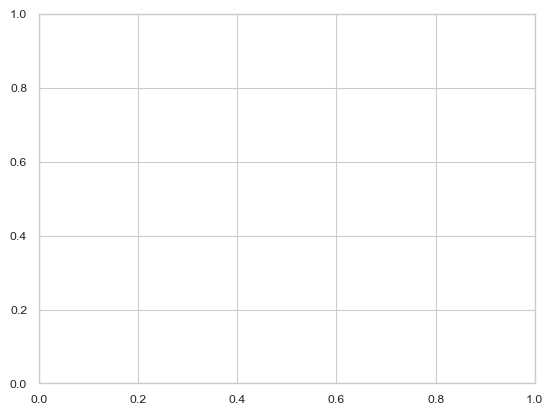

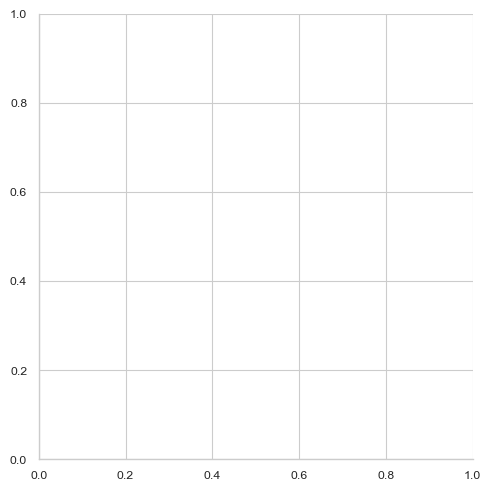

In [15]:
sns.set_context("paper") # poster, talk, notebook

print(type(sns.scatterplot()));
print(type(sns.relplot()));

# Titles

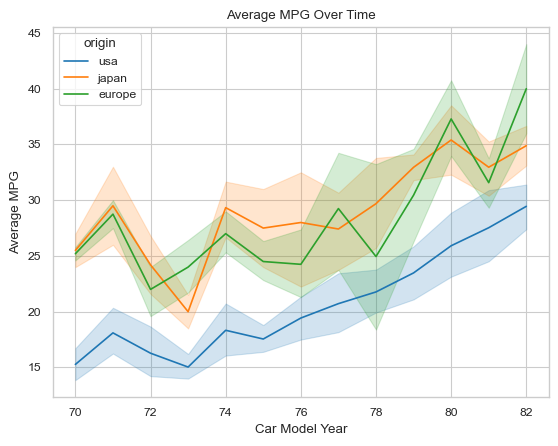

In [16]:
# Create line plot
g = sns.lineplot(x="model_year", y="mpg", 
                 data=mpg,
                 hue="origin")

# Add a title "Average MPG Over Time"
g.set_title("Average MPG Over Time")

# Add x-axis and y-axis labels
g.set(xlabel="Car Model Year",ylabel="Average MPG")

# Show plot
plt.show()

# Displot

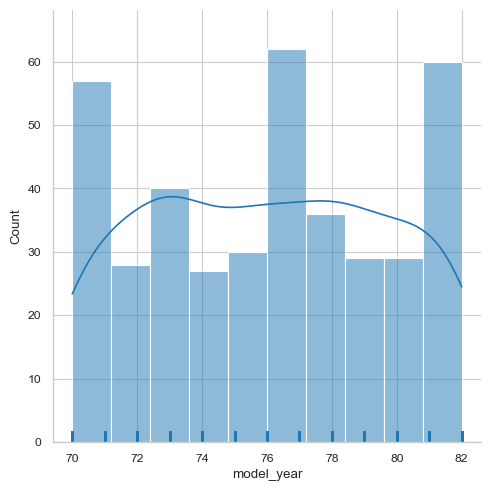

In [17]:
sns.displot(mpg["model_year"], kde=True, rug=True, bins=10, fill=True)

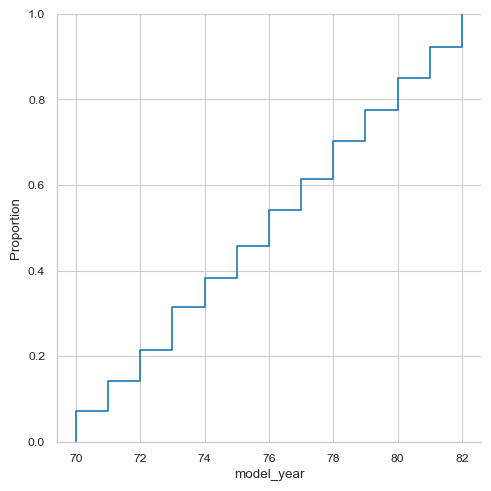

In [18]:
sns.displot(mpg["model_year"], kind='ecdf')

# regplot y lmplot

<Axes: xlabel='insurance_losses', ylabel='premiums'>

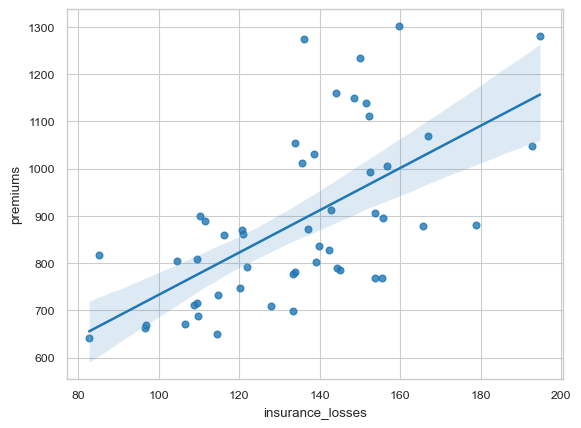

In [19]:
sns.regplot(data=insurance, x='insurance_losses', y='premiums')

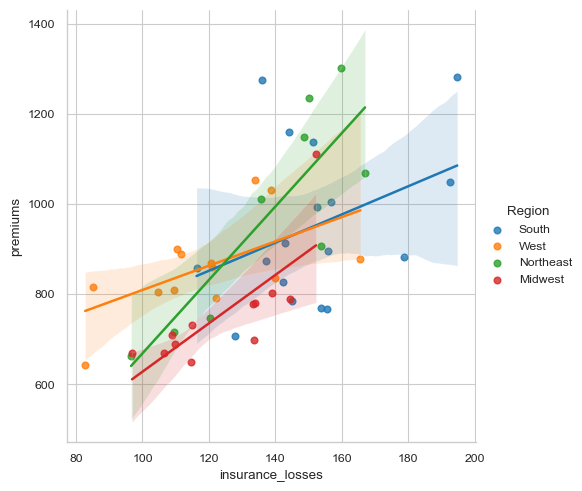

In [20]:
sns.lmplot(data=insurance, x='insurance_losses', y='premiums', hue='Region')

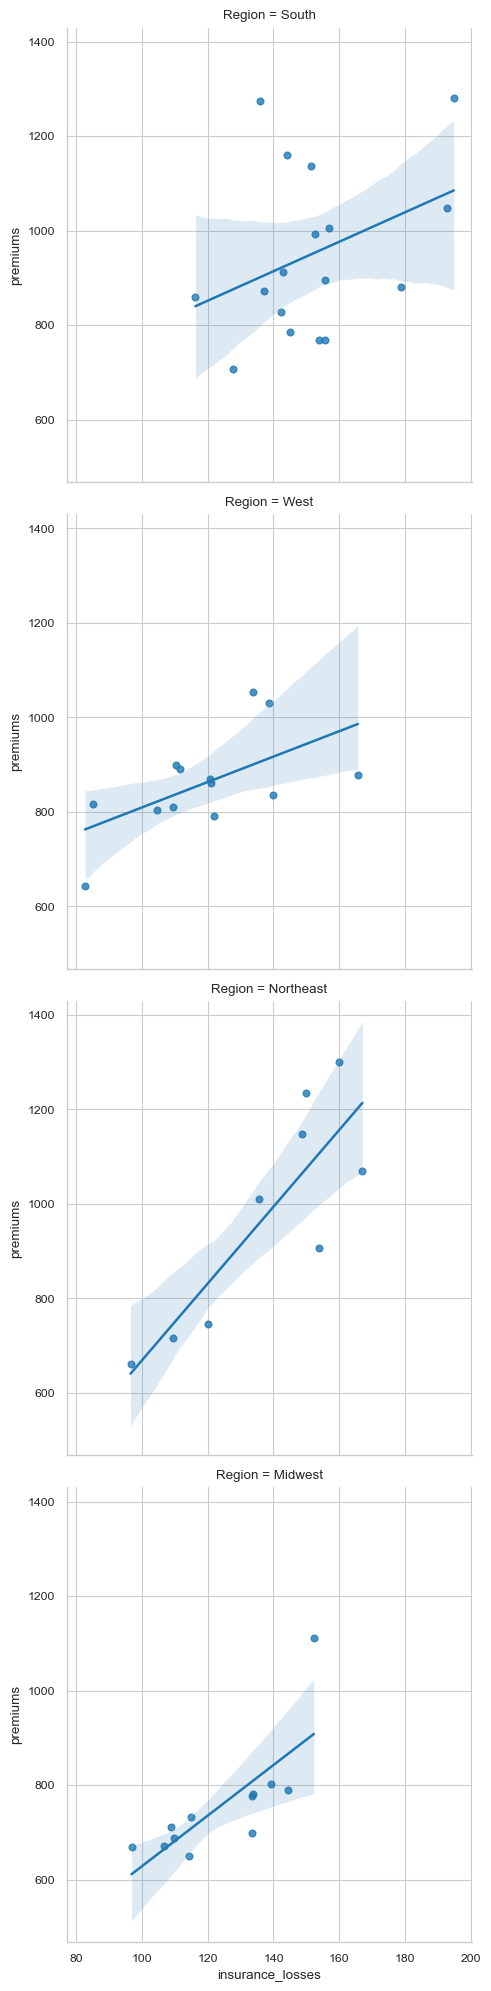

In [21]:
sns.lmplot(data=insurance, x='insurance_losses', y='premiums', row='Region')

# despine()

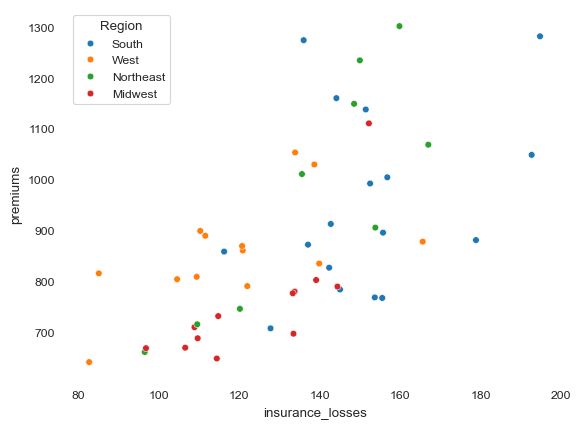

In [22]:
# remove axis
sns.set_style('white')
sns.scatterplot(data=insurance, x='insurance_losses', y='premiums', hue='Region')    
sns.despine(left=True, bottom=True)

# sns.set()
Permite cambiar el estilo de los graficos de pandas

<Axes: ylabel='Frequency'>

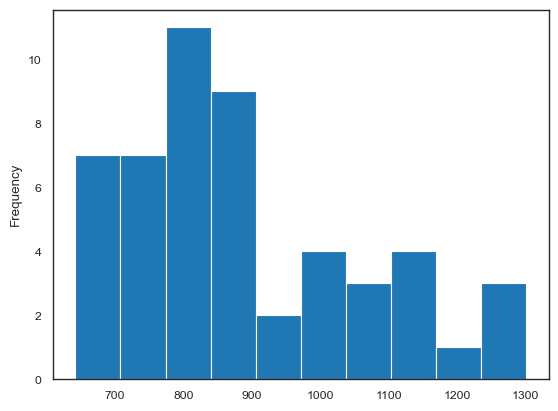

In [23]:
insurance["premiums"].plot.hist()

<Axes: ylabel='Frequency'>

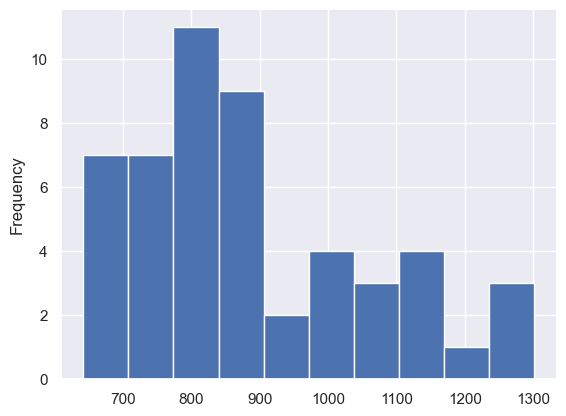

In [24]:
sns.set()
insurance["premiums"].plot.hist()

In [25]:
sns.set(color_codes=True)

# palplot

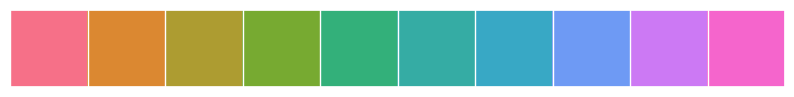

In [26]:
pal = sns.color_palette("husl", 10)
sns.palplot(pal)

In [27]:
"""
sns.violinplot(data=df,
         x='Award_Amount',
         y='Model Selected',
         palette='husl')

plt.show()
plt.clf()
"""

"\nsns.violinplot(data=df,\n         x='Award_Amount',\n         y='Model Selected',\n         palette='husl')\n\nplt.show()\nplt.clf()\n"

# regplot y residplot (plotea residuales con respecto a regresion lineal)

In [28]:
sns.regplot(data=student_data,
         y='Tuition',
         x='SAT_AVG_ALL',
         marker='^',
         color='g',
        order = 2)

KeyError: 'SAT_AVG_ALL'

In [ ]:
sns.residplot(data=student_data,
          y='Tuition',
          x='SAT_AVG_ALL',
          color='g')

# heatmap

<Axes: xlabel='YEAR', ylabel='Group'>

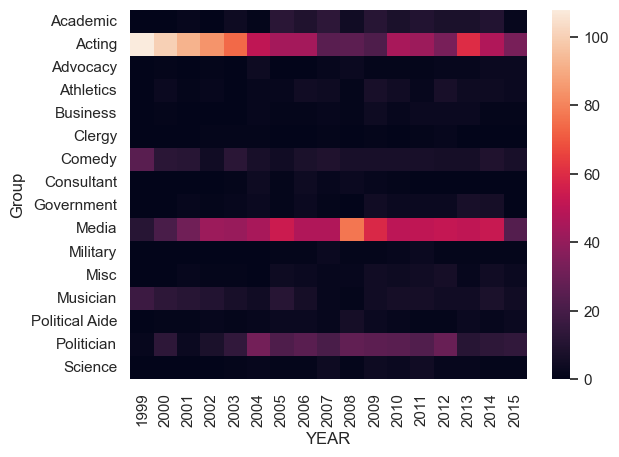

In [33]:
sns.heatmap(pd.crosstab(daily_show["Group"], daily_show["YEAR"]))

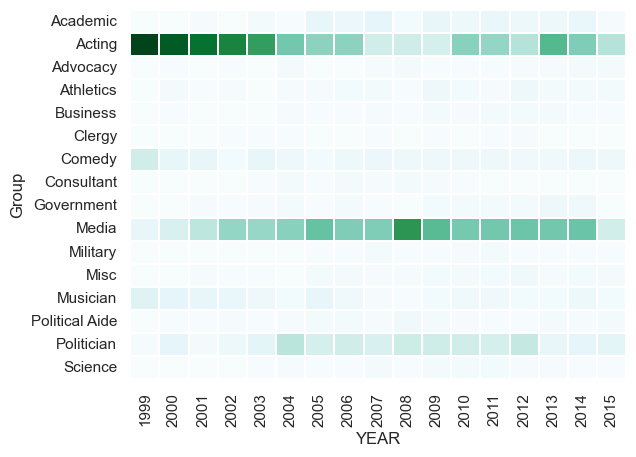

In [36]:
# Create the crosstab DataFrame
pd_crosstab = pd.crosstab(daily_show["Group"], daily_show["YEAR"])

# Plot a heatmap of the table with no color bar and using the BuGn palette
sns.heatmap(pd_crosstab, cbar=False, cmap="BuGn", linewidths=0.3)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90);

# FacetGrid

C:\Program Files\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


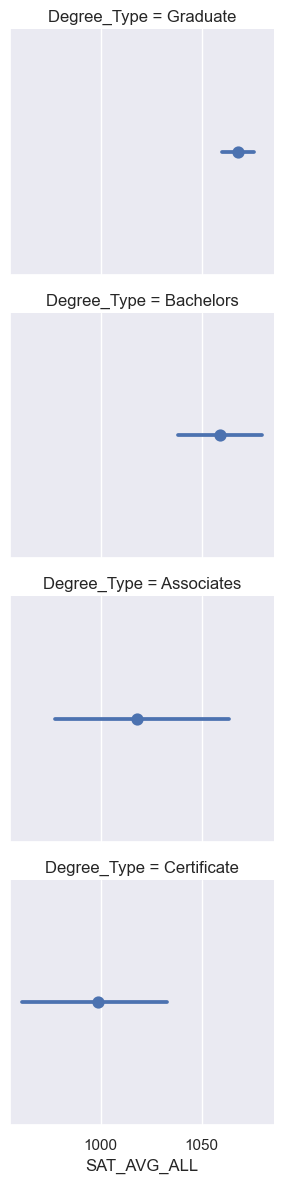

In [39]:
g2 = sns.FacetGrid(college, 
             row="Degree_Type",
             row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, 'SAT_AVG_ALL');

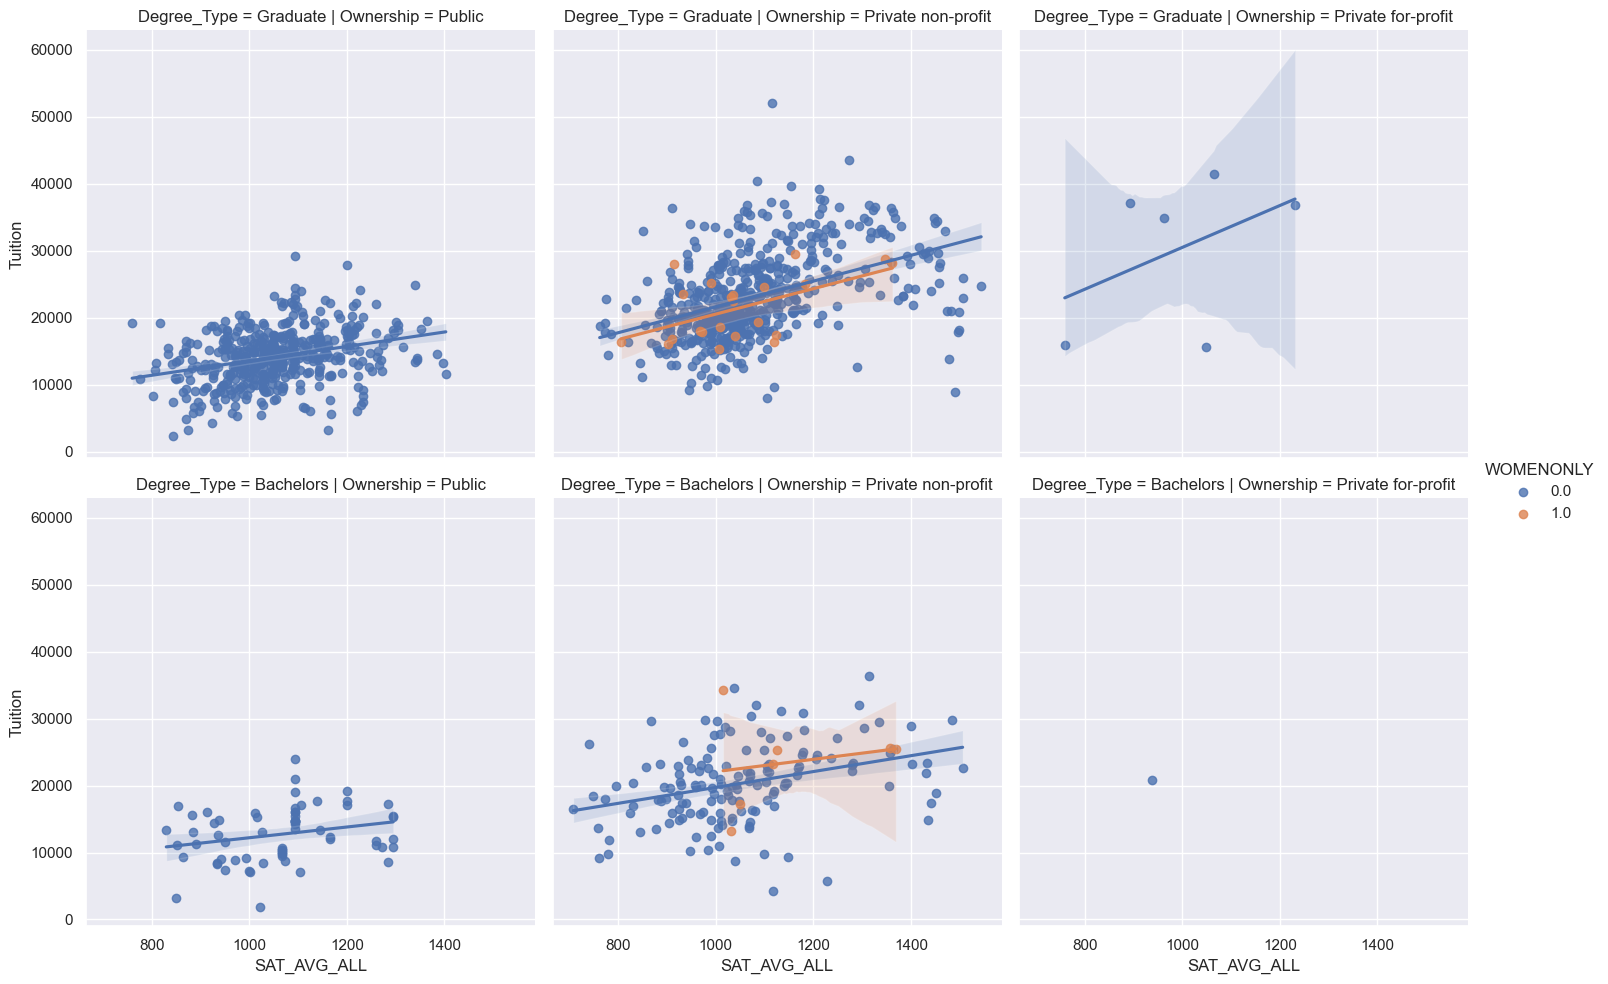

In [40]:
sns.lmplot(data=college,
        x='SAT_AVG_ALL',
        y='Tuition',
        col="Ownership",
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors'],
        hue='WOMENONLY')

# PairGrid y pairwise

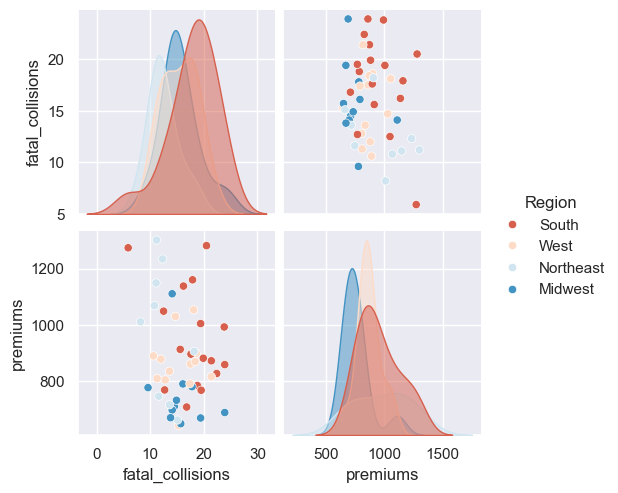

In [41]:
sns.pairplot(data=insurance,
        vars=["fatal_collisions", "premiums"],
        kind='scatter',
        hue='Region',
        palette='RdBu',
        diag_kws={'alpha':.5})

# JointGrid y jointplot

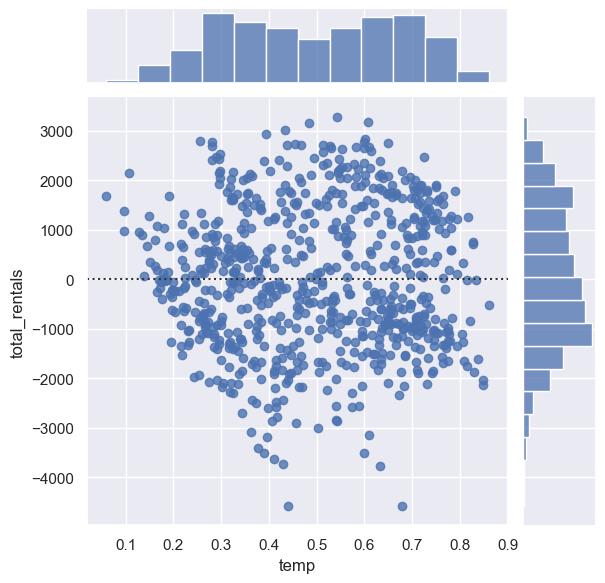

In [43]:
sns.jointplot(x="temp",
        y="total_rentals",
        kind='resid',
        data=bikes,
        order=2)

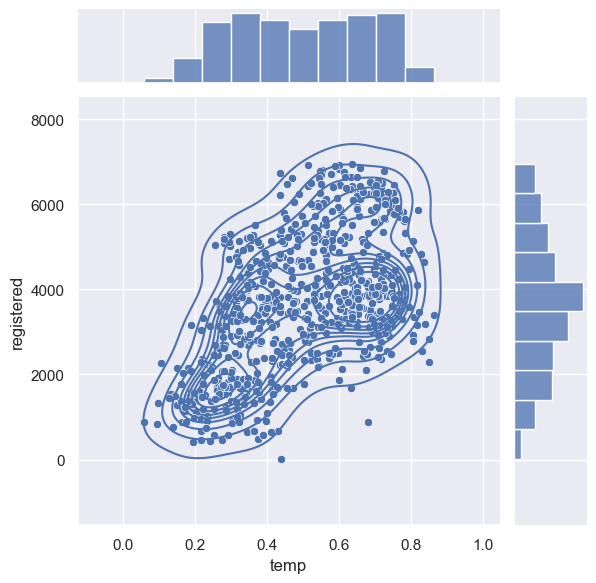

In [44]:
g = sns.jointplot(x="temp",
             y="registered",
             kind='scatter',
             data=bikes,
             marginal_kws=dict(bins=10))
g.plot_joint(sns.kdeplot)